Zip file path: C:/Users/pragy/Downloads/pneumoniamnist.zip
Unzipping C:/Users/pragy/Downloads/pneumoniamnist.zip to C:/Users/pragy/Downloads...
Unzipping complete.
Loading data from C:/Users/pragy/Downloads\pneumoniamnist.npz...
Keys in the .npz file: ['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']

Dataset loaded successfully!
Train images shape: (3882, 28, 28)
Train labels shape: (3882, 1)
Validation images shape: (524, 28, 28)
Validation labels shape: (524, 1)
Test images shape: (624, 28, 28)
Test labels shape: (624, 1)

Displaying a random sample from each dataset:


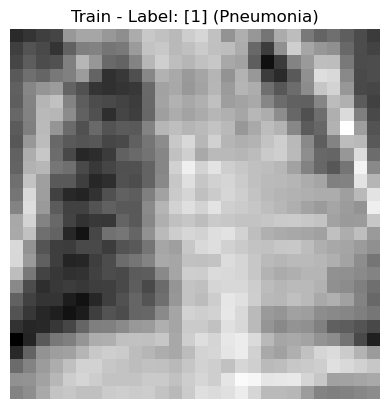

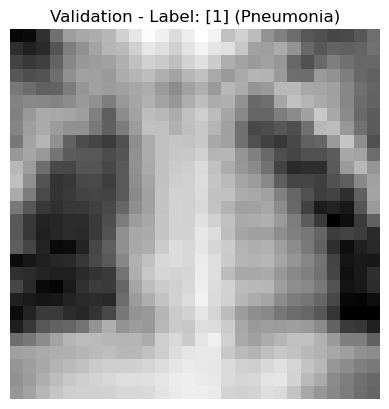

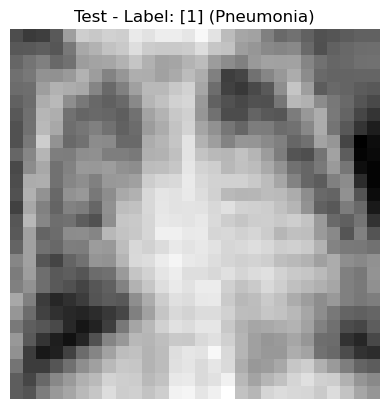


Shape of a processed image: (224, 224, 3)
Preprocessing function output shape is correct!
Calculated Class Weights: {0: np.float64(5.002577319587629), 1: np.float64(0.5555237550085862)}

--- Phase 1: Training the custom classification head ---
Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9845 - loss: 0.2657 - precision: 0.9940 - recall: 0.9904 - val_accuracy: 0.2576 - val_loss: 1.1289 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.0318 - loss: 0.9250 - precision: 0.9608 - recall: 0.0267 - val_accuracy: 0.2576 - val_loss: 0.7803 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.0292 - loss: 0.5108 - precision: 0.2850 - recall: 0.0269 - val_accuracy: 0.2576 - val_loss: 0.7052 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.0311 - loss: 0.4236 - precision

C:\Anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
   Pneumonia       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624


Confusion Matrix:
[[  0 234]
 [  0 390]]


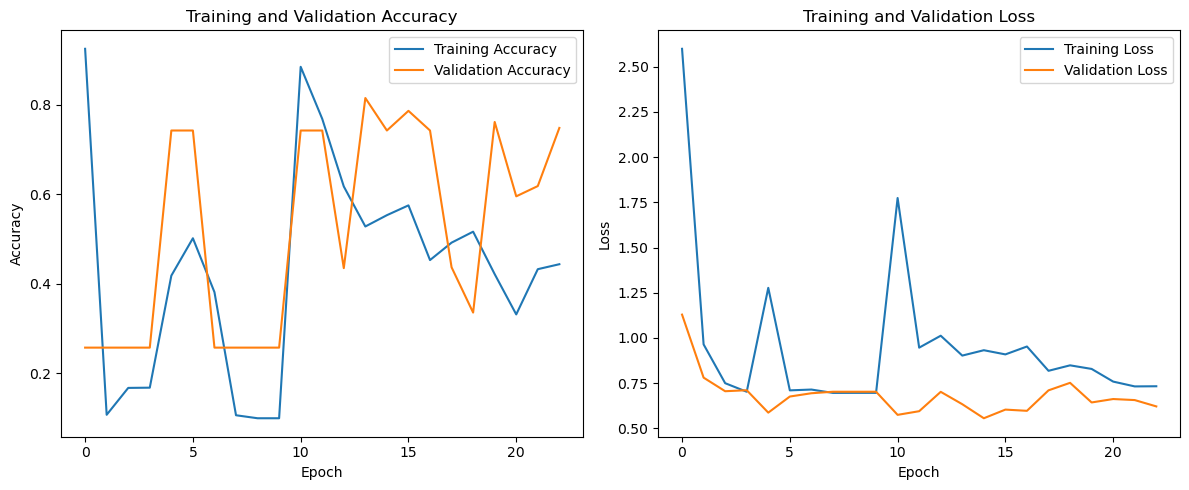

In [3]:
import zipfile
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Although we use tf.data for augmentation now
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import class_weight

# --- Data Loading (Your existing, working code) ---
# 1. Define the path to your downloaded zip file
zip_file_path = os.path.expanduser('C:/Users/pragy/Downloads/pneumoniamnist.zip')
print(f"Zip file path: {zip_file_path}")

# 2. Define a directory where you want to extract the files
extract_dir = os.path.expanduser('C:/Users/pragy/Downloads')
os.makedirs(extract_dir, exist_ok=True) # Create the directory if it doesn't exist

# 3. Unzip the file
print(f"Unzipping {zip_file_path} to {extract_dir}...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Unzipping complete.")

# 4. Load the data using NumPy
npz_file = None
for root, _, files in os.walk(extract_dir):
    for f in files:
        if f.endswith('.npz') and 'pneumoniamnist' in f.lower():
            npz_file = os.path.join(root, f)
            break
    if npz_file:
        break

train_images, train_labels = None, None
val_images, val_labels = None, None
test_images, test_labels = None, None

if npz_file:
    print(f"Loading data from {npz_file}...")
    data = np.load(npz_file)

    # Check the keys available in the .npz file
    print(f"Keys in the .npz file: {data.files}")

    # Access the arrays
    train_images = data['train_images']
    train_labels = data['train_labels']
    val_images = data['val_images']
    val_labels = data['val_labels']
    test_images = data['test_images']
    test_labels = data['test_labels']

    print("\nDataset loaded successfully!")
    print(f"Train images shape: {train_images.shape}")
    print(f"Train labels shape: {train_labels.shape}")
    print(f"Validation images shape: {val_images.shape}")
    print(f"Validation labels shape: {val_labels.shape}")
    print(f"Test images shape: {test_images.shape}")
    print(f"Test labels shape: {test_labels.shape}")

elif 'train_images.npy' in os.listdir(extract_dir): # If individual .npy files are present directly
    print("Loading data from individual .npy files...")
    train_images = np.load(os.path.join(extract_dir, 'train_images.npy'))
    train_labels = np.load(os.path.join(extract_dir, 'train_labels.npy'))
    val_images = np.load(os.path.join(extract_dir, 'val_images.npy'))
    val_labels = np.load(os.path.join(extract_dir, 'val_labels.npy'))
    test_images = np.load(os.path.join(extract_dir, 'test_images.npy'))
    test_labels = np.load(os.path.join(extract_dir, 'test_labels.npy'))

    print("\nDataset loaded successfully!")
    print(f"Train images shape: {train_images.shape}")
    print(f"Train labels shape: {train_labels.shape}")
    print(f"Validation images shape: {val_images.shape}")
    print(f"Validation labels shape: {val_labels.shape}")
    print(f"Test images shape: {test_images.shape}")
    print(f"Test labels shape: {test_labels.shape}")

else:
    print("Could not find expected data files (.npz or .npy) in the extracted directory.")
    print("Please inspect the contents of the 'pneumoniamnist.zip' file after extraction to identify the correct file names.")
    exit() # Exit if data is not loaded

# Function to plot a random image from dataset
def show_random_image(images, labels, dataset_name):
    if len(images) == 0:
        print(f"No images in {dataset_name} dataset to display.")
        return
    idx = random.randint(0, len(images) - 1)
    image = images[idx]
    label = labels[idx]

    plt.imshow(image.squeeze(), cmap='gray') # squeeze in case it's (1, 28, 28)
    plt.title(f"{dataset_name} - Label: {label} ({'Pneumonia' if label == 1 else 'Normal'})")
    plt.axis('off')
    plt.show()

# Show a random image from each dataset
print("\nDisplaying a random sample from each dataset:")
show_random_image(train_images, train_labels, "Train")
show_random_image(val_images, val_labels, "Validation")
show_random_image(test_images, test_labels, "Test")

# --- Data Preprocessing and Augmentation ---
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess_image(image, label):
    # Convert to float32
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Add a channel dimension if grayscale (28x28 to 28x28x1)
    if image.shape.ndims == 2:
        image = tf.expand_dims(image, axis=-1)

    # Replicate the single channel to 3 channels (RGB) for ResNet-50 input
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)

    # Resize to ResNet-50 input size
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

    return image, label

# --- IMPORTANT: Verify the output of preprocess_image ---
# Take one sample to verify the shape after preprocessing
sample_image_orig, sample_label_orig = train_images[0], train_labels[0]
processed_image, _ = preprocess_image(tf.constant(sample_image_orig), tf.constant(sample_label_orig))
print(f"\nShape of a processed image: {processed_image.shape}")
if processed_image.shape == (IMG_SIZE, IMG_SIZE, 3):
    print("Preprocessing function output shape is correct!")
else:
    print("WARNING: Preprocessing function output shape is NOT correct. Expected (224, 224, 3).")
    # You might want to raise an error or exit here if the shape is critical

# Create TensorFlow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Data Augmentation for training set
# Applying augmentation before batching is generally preferred for performance with tf.data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"), # Only horizontal flips are typical for X-rays
    tf.keras.layers.RandomRotation(0.1), # Smaller rotation
    tf.keras.layers.RandomZoom(0.1),     # Smaller zoom
    tf.keras.layers.RandomBrightness(0.1), # Add brightness variation
    tf.keras.layers.RandomContrast(0.1)  # Add contrast variation
])

def augment_and_preprocess(image, label):
    image, label = preprocess_image(image, label) # First preprocess
    image = data_augmentation(image) # Then augment
    return image, label

# Apply preprocessing and augmentation to respective datasets
train_ds_processed = train_ds.map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_processed = val_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_processed = test_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


# --- Model Building: Fine-tuning ResNet-50 ---
# Load the ResNet-50 model pre-trained on ImageNet, without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the convolutional base to train only the new layers initially
base_model.trainable = False

# Add a new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x) # Global Average Pooling to reduce dimensions
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout for regularization
predictions = Dense(1, activation='sigmoid')(x) # Single output neuron for binary classification with sigmoid

model = Model(inputs=base_model.input, outputs=predictions)

# --- Handling Class Imbalance ---
# Calculate class weights for imbalanced dataset
# Convert labels to 1D array for class_weight.compute_class_weight
train_labels_flat = train_labels.flatten()
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_flat),
    y=train_labels_flat
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Calculated Class Weights:", class_weights_dict)

# --- Model Training ---

# Phase 1: Train only the new classification head
print("\n--- Phase 1: Training the custom classification head ---")
model.compile(optimizer=Adam(learning_rate=0.001), # Higher learning rate for the new head
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

early_stopping_phase1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

EPOCHS_PHASE1 = 15 # Start with fewer epochs for this phase
history_phase1 = model.fit(
    train_ds_processed,
    epochs=EPOCHS_PHASE1,
    validation_data=val_ds_processed,
    class_weight=class_weights_dict,
    callbacks=[early_stopping_phase1]
)

# Phase 2: Fine-tune the entire model (or a portion of the base model)
print("\n--- Phase 2: Fine-tuning the entire model (or part of it) ---")

# Unfreeze the entire base model for fine-tuning
base_model.trainable = True

# Recompile the model with a very low learning rate for fine-tuning
# It's crucial to use a very small learning rate when fine-tuning the pre-trained layers
model.compile(optimizer=Adam(learning_rate=1e-5), # Very small learning rate
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

early_stopping_phase2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8, # More patience for fine-tuning
    restore_best_weights=True
)

EPOCHS_PHASE2 = 25 # More epochs for fine-tuning
total_epochs = EPOCHS_PHASE1 + EPOCHS_PHASE2

history_phase2 = model.fit(
    train_ds_processed,
    epochs=total_epochs,
    initial_epoch=history_phase1.epoch[-1] if history_phase1.epoch else 0, # Start from where previous training left off
    validation_data=val_ds_processed,
    class_weight=class_weights_dict,
    callbacks=[early_stopping_phase2]
)

# --- Model Evaluation ---
print("\nEvaluating model on the test set...")
loss, accuracy, precision, recall = model.evaluate(test_ds_processed)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

# Generate classification report for detailed metrics
test_predictions = model.predict(test_ds_processed)
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Extract true labels from the test_ds_processed (which is batched)
test_true_labels = []
for _, labels_batch in test_ds_processed: # Iterate over the *batched* dataset
    test_true_labels.append(labels_batch.numpy())

# Concatenate all batches and flatten to a 1D array for scikit-learn metrics
test_true_labels = np.concatenate(test_true_labels).flatten()


print("\nClassification Report:")
print(classification_report(test_true_labels, test_predictions_binary, target_names=['Normal', 'Pneumonia']))

print("\nConfusion Matrix:")
cm = confusion_matrix(test_true_labels, test_predictions_binary)
print(cm)

# Plotting training history
# Combine histories from both phases
hist_acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
hist_val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']
hist_loss = history_phase1.history['loss'] + history_phase2.history['loss']
hist_val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']


plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(hist_acc, label='Training Accuracy')
plt.plot(hist_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(hist_loss, label='Training Loss')
plt.plot(hist_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()